# Exploración de las trazas.
Las trazas fueron proporcionados por la OSF: COCOA.

Dependencias a utilizar:

In [1]:
import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Lectura de nuestra traza y especificación de que las columnas están separadas por un ';'
df = pd.read_csv("Archivos_trazas/Prosumer_ABC.csv", sep=';')
# Mostrar las primeras 5 filas de nuestro dataframe.
df.head()

,ID,Consumo (0) / Producción (1),Dia,Mes,Año,1,2,3,4,5,...,87,88,89,90,91,92,93,94,95,96
0,ABC,0,2,11,2013,58.00,75.0,65.0,0.08,67.0,...,338.0,369.0,318.00,322.0,345.0,298.00,316.00,299.0,341.00,304.0
1,ABC,0,3,11,2013,0.16,0.1,68.0,69.00,75.0,...,67.0,74.0,61.00,84.0,74.0,67.00,77.00,91.0,0.07,61.0
2,ABC,0,4,11,2013,0.08,66.0,77.0,64.00,84.0,...,114.0,106.0,128.00,511.0,74.0,84.00,59.00,69.0,69.00,71.0
3,ABC,0,5,11,2013,68.00,58.0,95.0,81.00,74.0,...,167.0,202.0,0.53,226.0,256.0,315.00,421.00,66.0,0.09,64.0
4,ABC,0,6,11,2013,77.00,61.0,97.0,65.00,78.0,...,117.0,345.0,351.00,69.0,57.0,0.07,0.07,72.0,56.00,78.0


A simple vista notamos que existían varios ceros en diferentes filas es por eso que creamos una nueva columna para contar los ceros dentro de las filas de consumo y producción.

In [3]:
# Insertamos una nueva columna de los ceros encontrados.
df.insert(2, "Ceros Encontrados", (df == 0).astype(int).sum(axis=1), True)
df

,ID,Consumo (0) / Producción (1),Ceros Encontrados,Dia,Mes,Año,1,2,3,4,...,87,88,89,90,91,92,93,94,95,96
0,ABC,0,1,2,11,2013,58.00,75.0,65.0,0.08,...,338.0,369.0,318.00,322.0,345.0,298.00,316.00,299.0,341.00,304.0
1,ABC,0,4,3,11,2013,0.16,0.1,68.0,69.00,...,67.0,74.0,61.00,84.0,74.0,67.00,77.00,91.0,0.07,61.0
2,ABC,0,1,4,11,2013,0.08,66.0,77.0,64.00,...,114.0,106.0,128.00,511.0,74.0,84.00,59.00,69.0,69.00,71.0
3,ABC,0,1,5,11,2013,68.00,58.0,95.0,81.00,...,167.0,202.0,0.53,226.0,256.0,315.00,421.00,66.0,0.09,64.0
4,ABC,0,1,6,11,2013,77.00,61.0,97.0,65.00,...,117.0,345.0,351.00,69.0,57.0,0.07,0.07,72.0,56.00,78.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,ABC,1,69,27,10,2014,0.00,0.0,0.0,0.00,...,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.0
724,ABC,1,75,28,10,2014,0.00,0.0,0.0,0.00,...,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.0
725,ABC,1,96,29,10,2014,0.00,0.0,0.0,0.00,...,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.0
726,ABC,1,91,30,10,2014,0.00,0.0,0.0,0.00,...,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.0


## Ordenamiento del dataframe ascendente a partir del dia.

Realizamos un formateo de las columnas Dia, mes y año a una sola (Dia) en formato datetime para después ordenar los datos desde el dia 1 hasta el 364.

In [4]:
# Renombramiento de las filas Dia, Mes y Año a dat, month, year
df.rename(columns={'Dia': 'day', 'Mes ': 'month', 'Año': 'year'}, inplace=True)
# Se insertan de nuevo al dataframe en este formato y se borran del df original.
df.insert(1, "Dia", pd.to_datetime(df.iloc[:, [3, 4, 5]]), True)
df = df.drop(columns=['day', 'month', 'year'])

In [5]:
# Se hace el ordenamiento y se resetean el index
df.sort_values(by='Dia').reset_index(drop=True)

,ID,Dia,Consumo (0) / Producción (1),Ceros Encontrados,1,2,3,4,5,6,...,87,88,89,90,91,92,93,94,95,96
0,ABC,2013-11-02,0,1,58.00,75.0,65.00,0.08,67.0,69.00,...,338.0,369.00,318.0,322.0,345.00,298.0,316.0,299.00,341.00,304.0
1,ABC,2013-11-02,1,94,0.00,0.0,0.00,0.00,0.0,0.00,...,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0
2,ABC,2013-11-03,1,77,0.00,0.0,0.00,0.00,0.0,0.00,...,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0
3,ABC,2013-11-03,0,4,0.16,0.1,68.00,69.00,75.0,0.09,...,67.0,74.00,61.0,84.0,74.00,67.0,77.0,91.00,0.07,61.0
4,ABC,2013-11-04,0,1,0.08,66.0,77.00,64.00,84.0,164.00,...,114.0,106.00,128.0,511.0,74.00,84.0,59.0,69.00,69.00,71.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,ABC,2014-10-29,0,1,83.00,74.0,0.06,78.00,63.0,54.00,...,117.0,308.00,261.0,74.0,0.09,78.0,452.0,0.16,78.00,69.0
724,ABC,2014-10-30,1,91,0.00,0.0,0.00,0.00,0.0,0.00,...,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0
725,ABC,2014-10-30,0,1,82.00,62.0,54.00,0.07,74.0,53.00,...,188.0,0.09,98.0,82.0,464.00,126.0,76.0,54.00,0.07,73.0
726,ABC,2014-10-31,0,19,64.00,119.0,218.00,225.00,205.0,71.00,...,148.0,123.00,138.0,135.0,73.00,76.0,57.0,0.08,77.00,191.0


## Verificar si todos los dias tienen consumo y producción dentro de la tabla.

Se realiza un agrupamiento por la columna Dia y Consumo (0) / Producción (1).

In [6]:
df_group = df.groupby(by=["Dia"])["Consumo (0) / Producción (1)"].count()

Al describir los datos vemos que los mínimos y máximos son iguales a 2, esto nos dice que todos los dias tienen valores de consumo y producción.

In [7]:
df_group.describe()

count    364.0
mean       2.0
std        0.0
min        2.0
25%        2.0
50%        2.0
75%        2.0
max        2.0
Name: Consumo (0) / Producción (1), dtype: float64

## Formateo de los datos para su visualización.

In [8]:
# Separación de los datos en dos dataframes para después trabajarlos por separado para un mejor análisis y además cuando se lleve a los auditores darles uno a uno y otro al otro.
df0 = df.loc[df["Consumo (0) / Producción (1)"] == 0]
df1 = df.loc[df["Consumo (0) / Producción (1)"] == 1]

In [9]:
# Se seleccionan solo los datos de consumo y producción.
df0_sub = df0.iloc[:, 4:101]
df1_sub = df1.iloc[:, 4:101]

In [10]:
# Se crea una lista de 96 elementos en formato Hora minuto desde 0:0 a 23:45
new_columns = [f"{i // 4}:{i % 4 * 15}" for i in range(96)]

# Renombrar las columnas del DataFrame con la nueva columna
df0_sub.columns = new_columns
df1_sub.columns = new_columns

## Gráfica para ver el consumo anual del cliente durante todo un año.

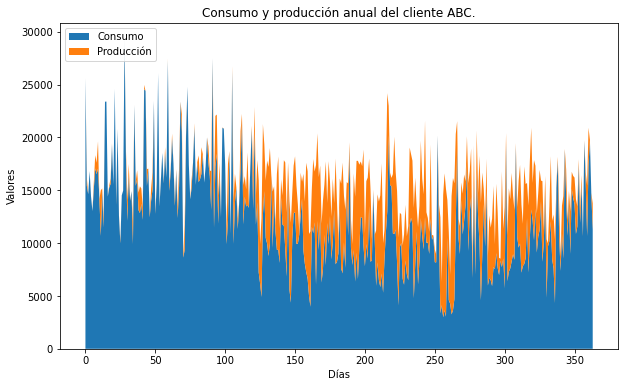

In [11]:
x = range(len(df0_sub))

plt.figure(figsize=(10, 6))
plt.title("Consumo y producción anual del cliente ABC.")

# Se utiliza un stackplot para tener consumo y producción en un solo plot, además que los datos se suman de todo el dia.
plt.stackplot(x, df0_sub.T.sum(), df1_sub.T.sum(), labels=["Consumo", "Producción"])

plt.xlabel('Días')
plt.ylabel('Valores')
plt.legend(loc='upper left')
plt.show()

## Gráfica de diferencia entre consumo y producción anual.

Se observa que solo a partir de entre abril y mayo empieza a existir dias donde se produce más que de lo que se consume.

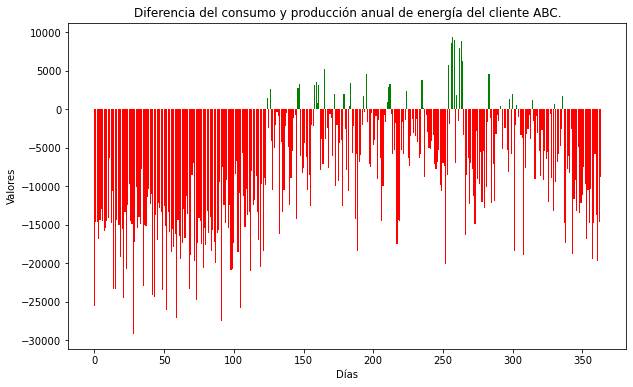

In [12]:
x = range(len(df0_sub))
plt.figure(figsize=(10, 6))
plt.title("Diferencia del consumo y producción anual de energía del cliente ABC.")

# Se hace una resta de producción menos consumo y se resetean los indices de los dataframes para poder realizar la resta
result = df1_sub.T.sum().reset_index(drop=True) - df0_sub.T.sum().reset_index(drop=True)

# Si el valor es mayor que 0 pintara los colores en verde y sí no en rojo
colors = ['g' if x > 0 else 'r' for x in result]
bar_chart = plt.bar(x, result, color=colors)

plt.xlabel('Días')
plt.ylabel('Valores')
plt.show()

# Gráfica de tipo reloj de consumo anual por hora del dia.

Con este tipo de gráficas podemos ver a que horas se consume más energía durante todo el día.

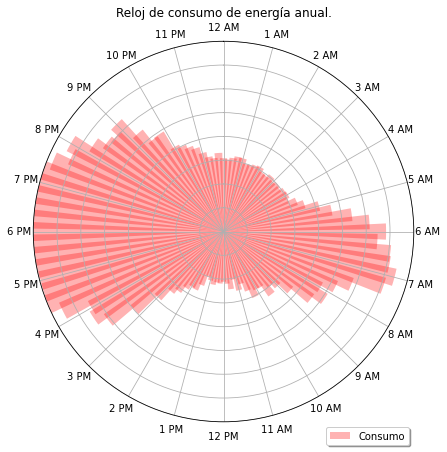

In [13]:
# Se utilizan los datos ya formateados en hora y minuto para poder manipularos en el plano polar.
df0_sum = df0_sub.sum().reset_index()
xs = pd.to_datetime(df0_sum['index'], format='%H:%M')
xs = xs - datetime.datetime.strptime('00:00:00', '%H:%M:%S')
xs = xs.dt.seconds / (24 * 3600)
xs = xs * 2 * np.pi

fig = plt.figure(figsize=(7, 7))
ax = plt.subplot(111, projection='polar')

# Se divide entre 40000 para que los datos se alcancen a observar dentro de la gráfica
ax.bar(xs, df0_sum[0] / 40000, width=0.1, alpha=0.3, color='red', label='Consumo')

# Hacer que los labels vayan en dirección del reloj
ax.set_theta_direction(-1)

# El punto de origen se define como cero.
ax.set_theta_offset(np.pi / 2)

#Set the circumference ticks
ax.set_xticks(np.linspace(0, 2 * np.pi, 24, endpoint=False))

# Preparar los nombres de los labels.
ticks = ['12 AM', '1 AM', '2 AM', '3 AM', '4 AM', '5 AM', '6 AM', '7 AM', '8 AM', '9 AM', '10 AM', '11 AM', '12 PM',
         '1 PM', '2 PM', '3 PM', '4 PM', '5 PM', '6 PM', '7 PM', '8 PM', '9 PM', '10 PM', '11 PM']
ax.set_xticklabels(ticks)

# Quitar los labels por default de los radianes
plt.setp(ax.get_yticklabels(), visible=False)

# Definición de los límites de y.
plt.ylim(0, 2)

plt.title("Reloj de consumo de energía anual.")
plt.legend(bbox_to_anchor=(1, 0), fancybox=True, shadow=True)
plt.show()

# Gráfica de tipo reloj de consumo anual por hora del dia.

Con este tipo de gráficas podemos ver a que horas se consume más energía durante todo el día.

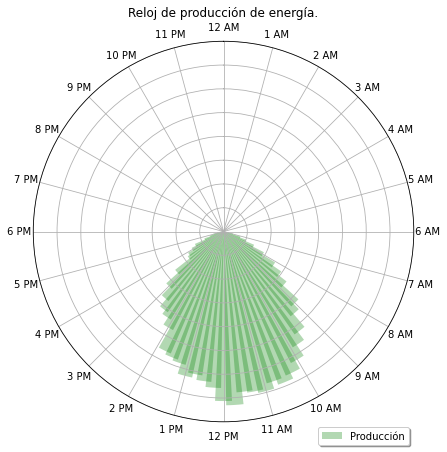

In [14]:
# Se utilizan los datos ya formateados en hora y minuto para poder manipularos en el plano polar.
df1_sum = df1_sub.sum().reset_index()
xs = pd.to_datetime(df1_sum['index'], format='%H:%M')
xs = xs - datetime.datetime.strptime('00:00:00', '%H:%M:%S')
xs = xs.dt.seconds / (24 * 3600)
xs = xs * 2 * np.pi

fig = plt.figure(figsize=(7, 7))
ax = plt.subplot(111, projection='polar')

# Se divide entre 30000 para que los datos se alcancen a observar dentro de la gráfica
ax.bar(xs, df1_sum[0] / 30000, width=0.1, alpha=0.3, color='green', label='Producción')

# Hacer que los labels vayan en dirección del reloj
ax.set_theta_direction(-1)

# El punto de origen se define como cero.
ax.set_theta_offset(np.pi / 2)

#Set the circumference ticks
ax.set_xticks(np.linspace(0, 2 * np.pi, 24, endpoint=False))

# Preparar los nombres de los labels.
ticks = ['12 AM', '1 AM', '2 AM', '3 AM', '4 AM', '5 AM', '6 AM', '7 AM', '8 AM', '9 AM', '10 AM', '11 AM', '12 PM',
         '1 PM', '2 PM', '3 PM', '4 PM', '5 PM', '6 PM', '7 PM', '8 PM', '9 PM', '10 PM', '11 PM']
ax.set_xticklabels(ticks)

# Quitar los labels por default de los radianes
plt.setp(ax.get_yticklabels(), visible=False)

# Definición de los límites de y.
plt.ylim(0, 2)

plt.title("Reloj de producción de energía.")
plt.legend(bbox_to_anchor=(1, 0), fancybox=True, shadow=True)
plt.show()